# **Salary Estimation | K-Nearest Neighbour model**

## **Importing Libraries**

In [22]:
import pandas as pd #sueful for dataset loading
import numpy as np #to perform array operations

## **Choose data from Local Directory**

In [23]:
from google.colab import files
ul = files.upload()

Saving salary.csv to salary (2).csv


## **Load Dataset**

In [24]:
dataset = pd.read_csv('salary.csv')
print(dataset)

       age  education.num  capital.gain  hours.per.week income
0       90              9             0              40  <=50K
1       82              9             0              18  <=50K
2       66             10             0              40  <=50K
3       54              4             0              40  <=50K
4       41             10             0              40  <=50K
...    ...            ...           ...             ...    ...
32556   22             10             0              40  <=50K
32557   27             12             0              38  <=50K
32558   40              9             0              40   >50K
32559   58              9             0              40  <=50K
32560   22              9             0              20  <=50K

[32561 rows x 5 columns]


## **Summarize Dataset**

In [25]:
print(dataset.shape)
print(dataset.head(5))


(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K


## **Mapping Salary Data to Binary Values**

In [26]:
print(dataset['income'].unique())

dataset['income'] = dataset['income'].str.strip()

dataset['income'] = dataset['income'].map({'<=50K': 0, '>50K':1}).astype('int')

print(dataset.head(10))



['<=50K' '>50K']
   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0
5   34              9             0              45       0
6   38              6             0              40       0
7   74             16             0              20       1
8   68              9             0              40       0
9   41             10             0              60       1


## **Segregate Dataset into input and output**

In [27]:
x = dataset.iloc[:,:-1].values
print(x)

[[90  9  0 40]
 [82  9  0 18]
 [66 10  0 40]
 ...
 [40  9  0 40]
 [58  9  0 40]
 [22  9  0 20]]


In [28]:
y = dataset.iloc[:,-1].values
print(y)

[0 0 0 ... 1 0 0]


## **Splitting Dataset for Training and Testing**

In [29]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.25, random_state=0)

## **Feature Scaling**

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)
print(x_train)

[[ 1.20264866 -2.76154633 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 [ 0.25021666 -0.42608063 -0.14509813 -0.03923011]
 ...
 [-0.92200734 -0.81532491 -0.14509813  0.85306386]
 [ 0.39674466  1.52014079 -0.14509813 -0.03923011]
 [ 0.03042466 -0.42608063  0.83219401 -0.03923011]]


## **Model Training, finding Mean error and plotting**

### **Model Training for Individual K Values**

Text(0, 0.5, 'Mean Error')

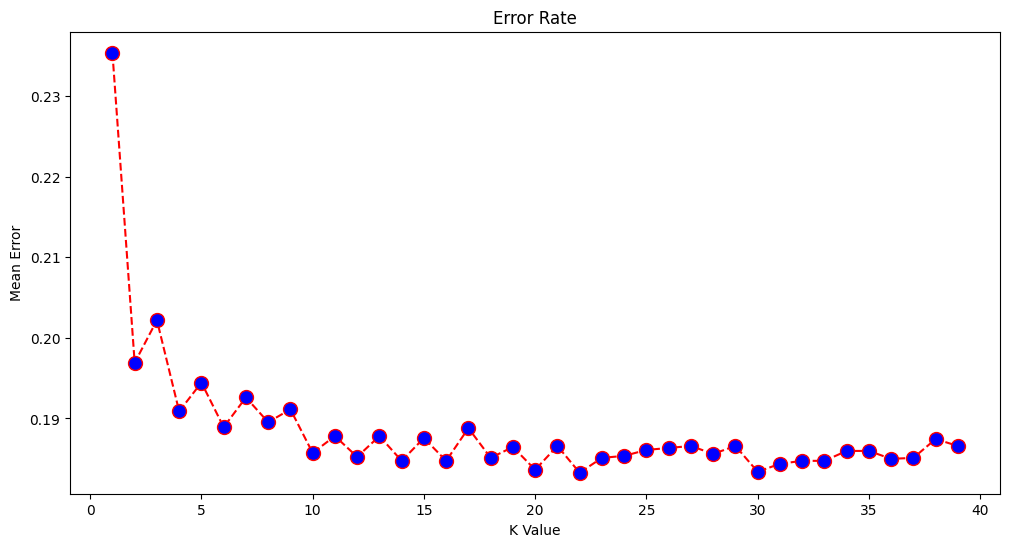

In [35]:
error = []
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,40):
  model = KNeighborsClassifier(n_neighbors=i)
  model.fit(x_train, y_train)
  pred = model.predict(x_test)
  error.append(np.mean(pred != y_test))

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(range(1,40), error, color ='red', linestyle ='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate')
plt.xlabel('K Value')
plt.ylabel('Mean Error')


## **Model Training for Specific K Value**

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 22, metric = 'minkowski', p=2)
model.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=22)

## **Prediction of all Test Data**

In [46]:
y_pred = model.predict(x_test)

## **Model Evaluation**

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score

#CONFUSION MATRIX
cm = confusion_matrix(y_test, y_pred)
print(cm)

#ACCURACY SCORE
print("Accuracy of the Model : {0}".format(accuracy_score(y_test, y_pred)*100))

[[5878  315]
 [1177  771]]
Accuracy of the Model : 81.67301314334848


## **Manual Testing of the Model**

In [41]:
age = int(input("Enter Employee's Age : "))
edu = int(input("Enter Employee's Education : "))
cg = int(input("Enter Employee's Capital Gain : "))
hw = int(input("Enter Employee's Hours Per Week : "))

x =[[age, edu, cg, hw]]
f_sc =sc.transform(x)
result = model.predict(f_sc)

if result == 1:
  print("Employee's Salary is >50K")
else:
  print("Emloyee's Salary is <=50K")

Enter Employee's Age : 45
Enter Employee's Education : 30
Enter Employee's Capital Gain : 1
Enter Employee's Hours Per Week : 45
Emloyee's Salary is <=50K
